# import

In [16]:
#基礎計算系のライブラリ
import numpy as np
from scipy import stats 
from math import pi, cos, sin
import pandas as pd

#クラスタリングに用いるライブラリ
from sklearn.cluster import KMeans
from pyclustering.cluster import kmeans, kmedoids, xmeans, dbscan
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer 
from kneed import KneeLocator

# 乱数発生に使うライブラリ
import random

#散布図の表示などに用いるライブラリ
import matplotlib.colors as plc 
import matplotlib.pyplot as plt 
from IPython.display import display, HTML 
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

# シミュレーションデータ作成

## パターン1(全てのクラスタが分割されているパターン)

Text(0, 0.5, 'Y')

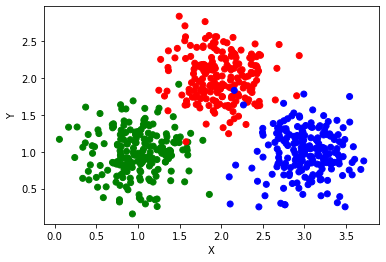

In [51]:
# シミュレーションデータ作成
x = np.array([np.random.normal(loc, 0.3, 200) for loc in [1, 2, 3]]).flatten() #ランダムな600個の数を生成
y = np.array([np.random.normal(loc, 0.3, 200) for loc in [1, 2, 1]]).flatten() #ランダムな600個の数を生成
data_1 = np.c_[x, y]

# シミュレーションデータの散布図描画
## 色の設定
c_list = ["g"]*200+["r"]*200+["b"]*200
plt.scatter(x, y, color=c_list)

## 軸ラベルの追加
plt.xlabel("X")
plt.ylabel("Y")

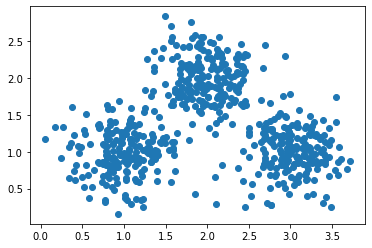

In [53]:
# 色なし版
plt.scatter(x, y)

## パターン2(クラスタの一部が重なっているパターン)

Text(0, 0.5, 'Y')

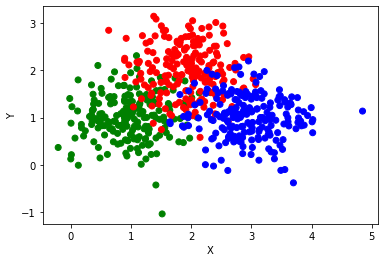

In [54]:
# シミュレーションデータ作成
x = np.array([np.random.normal(loc, 0.5, 200) for loc in [1, 2, 3]]).flatten() #ランダムな600個の数を生成
y = np.array([np.random.normal(loc, 0.5, 200) for loc in [1, 2, 1]]).flatten() #ランダムな600個の数を生成
data_2 = np.c_[x, y]

# シミュレーションデータの散布図描画
## 色の設定
c_list = ["g"]*200+["r"]*200+["b"]*200
plt.scatter(x, y, color=c_list)

## 軸ラベルの追加
plt.xlabel("X")
plt.ylabel("Y")

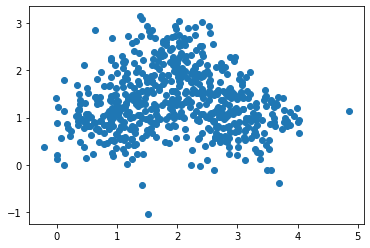

In [55]:
# 色なし版
plt.scatter(x, y)

## パターン3(同心円状に分布しているパターン)

Text(0, 0.5, 'Y')

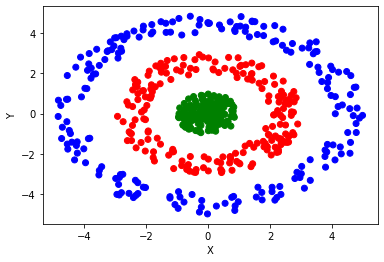

In [56]:
# シミュレーションデータ作成
r = np.array([np.random.uniform(min, max, 200) for min, max in zip([0, 2, 4], [1, 3, 5])]).flatten() #ランダムな600個の数を生成
theta = np.random.uniform(low=0, high=2*pi, size=600) #ランダムな600個の数を生成

x = np.array([r_e*cos(theta_e) for r_e, theta_e in zip(r, theta)])
y = np.array([r_e*sin(theta_e) for r_e, theta_e in zip(r, theta)])
data_3 = np.c_[x, y]

# シミュレーションデータの散布図描画
## 色の設定
c_list = ["g"]*200+["r"]*200+["b"]*200
plt.scatter(x, y, color=c_list)

## 軸ラベルの追加
plt.xlabel("X")
plt.ylabel("Y")

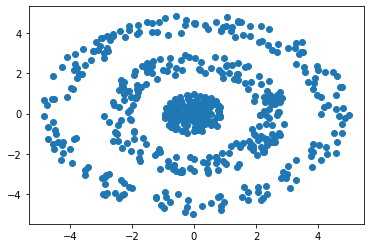

In [57]:
# 色なし版
plt.scatter(x, y)

## パターン4(外れ値が存在するパターン)

Text(0, 0.5, 'Y')

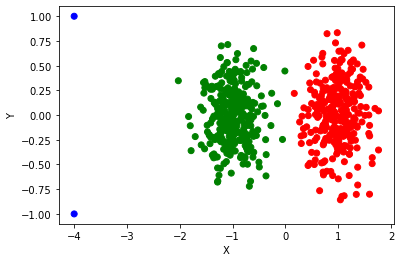

In [5]:
# シミュレーションデータ作成
x = np.array([np.random.normal(loc, 0.3, 299) for loc in [-1, 1]]).flatten() #ランダムな598個の数を生成
y = np.array([np.random.normal(loc, 0.3, 299) for loc in [0, 0]]).flatten() #ランダムな598個の数を生成

# 外れ値追加
x = np.append(x, -4)
y = np.append(y, 1)
x = np.append(x, -4)
y = np.append(y, -1)


data_4 = np.c_[x, y]

# シミュレーションデータの散布図描画
## 色の設定
c_list = ["g"]*299+["r"]*299+["b"]*2
plt.scatter(x, y, color=c_list)

## 軸ラベルの追加
plt.xlabel("X")
plt.ylabel("Y")

# 外れ値の再現性が難しいので保存
# run allしても上書きされないようにする
try:
    pd.DataFrame(data_4).to_csv("data_4.csv", index=False, mode="x")
except FileExistsError:
    print()    

Text(0, 0.5, 'Y')

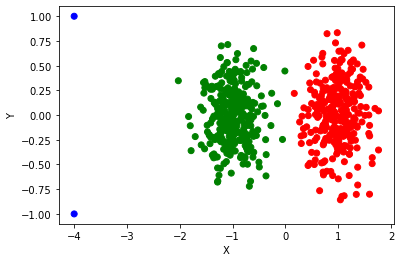

In [6]:
# 再現しにくいので固定されたデータを再読み込み
#data_4 = np.array(pd.read_csv("data_4.csv")[["0", "1"]])
x = data_4[:, 0]
y = data_4[:, 1]

# シミュレーションデータの散布図描画
## 色の設定
c_list = ["g"]*299+["r"]*299+["b"]*2
plt.scatter(x, y, color=c_list)

## 軸ラベルの追加
plt.xlabel("X")
plt.ylabel("Y")

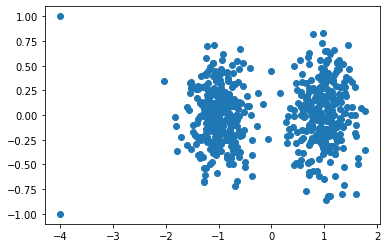

In [7]:
# 色なし版
plt.scatter(x, y)

# k-meansの実行

## パターン1

<ipython-input-8-638bb10d6e31>:17: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  color_series = pd.Series(index=np.arange(600))


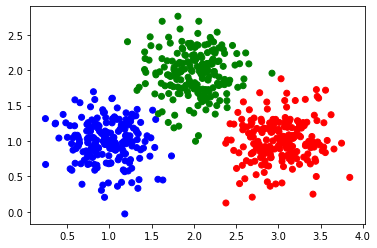

In [8]:
# 初期値設定
initial_centers = kmeans_plusplus_initializer(data_1, 3).initialize() #3はクラスタ数

# kmeansクラスの定義
data_1_kmeans = kmeans.kmeans(data_1, initial_centers)

# 学習の実行
data_1_kmeans.process()

# 可視化
#_ = kmeans.kmeans_visualizer.show_clusters(data_1, data_1_kmeans.get_clusters(), data_1_kmeans.get_centers(), initial_centers=initial_centers)

# 各クラスタのインデックス取得
labels = data_1_kmeans.get_clusters()

# クラスタごとに色を分ける
color_series = pd.Series(index=np.arange(600))
c_list = ["g", "r", "b"]
for i, c in enumerate(c_list):
    color_series[labels[i]] = c

plt.scatter(data_1[:,0], data_1[:,1], color=color_series)

## パターン2

<ipython-input-9-780430a607cb>:17: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  color_series = pd.Series(index=np.arange(600))


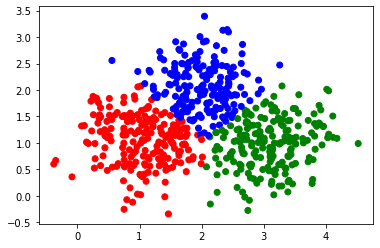

In [9]:
# 初期値設定
initial_centers = kmeans_plusplus_initializer(data_2, 3).initialize() #3はクラスタ数

# kmeansクラスの定義
data_2_kmeans = kmeans.kmeans(data_2, initial_centers)

# 学習の実行
data_2_kmeans.process()

# 可視化
#_ = kmeans.kmeans_visualizer.show_clusters(data_2, data_2_kmeans.get_clusters(), data_2_kmeans.get_centers(), initial_centers=initial_centers)

# 各クラスタのインデックス取得
labels = data_2_kmeans.get_clusters()

# クラスタごとに色を分ける
color_series = pd.Series(index=np.arange(600))
c_list = ["g", "r", "b"]
for i, c in enumerate(c_list):
    color_series[labels[i]] = c

plt.scatter(data_2[:,0], data_2[:,1], color=color_series)

## パターン3

<ipython-input-10-2ba5ff0c3f2e>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  color_series = pd.Series(index=np.arange(600))


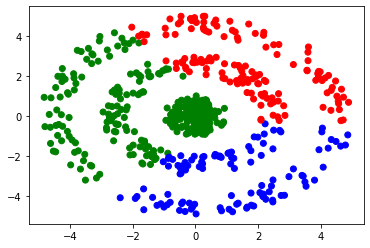

In [10]:
# 初期値設定
initial_centers = kmeans_plusplus_initializer(data_3, 3).initialize() #2はクラスタ数

# kmeansクラスの定義
data_3_kmeans = kmeans.kmeans(data_3, initial_centers)

# 学習の実行
data_3_kmeans.process()

# 各クラスタのインデックス取得
labels = data_3_kmeans.get_clusters()

# クラスタごとに色を分ける
color_series = pd.Series(index=np.arange(600))
c_list = ["g", "r", "b"]
for i, c in enumerate(c_list):
    color_series[labels[i]] = c

plt.scatter(data_3[:,0], data_3[:,1], color=color_series)

## パターン4

<ipython-input-11-a0ee32636a48>:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  color_series = pd.Series(index=np.arange(600))


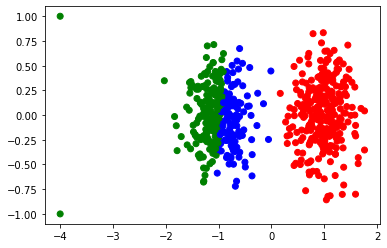

In [11]:
# 再現しにくいので固定されたデータを再読み込み
#data_4 = np.array(pd.read_csv("data_4.csv")[["0", "1"]])
# 初期値設定
initial_centers = kmeans_plusplus_initializer(data_4, 3).initialize() #2はクラスタ数

# kmeansクラスの定義
data_4_kmeans = kmeans.kmeans(data_4, initial_centers)

# 学習の実行
data_4_kmeans.process()

# 各クラスタのインデックス取得
labels = data_4_kmeans.get_clusters()

# クラスタごとに色を分ける
color_series = pd.Series(index=np.arange(600))
c_list = ["g", "r", "b"]
for i, c in enumerate(c_list):
    color_series[labels[i]] = c

plt.scatter(data_4[:,0], data_4[:,1], color=color_series)

# k-medoid

## パターン1

<ipython-input-13-94ee36e69b92>:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  color_series = pd.Series(index=np.arange(600))


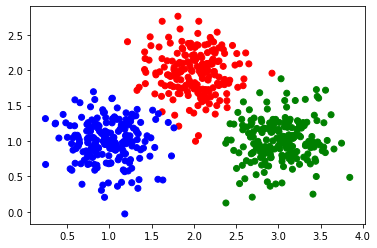

In [13]:
# 初期値設定
# 初期値は1～len(data)の中でクラスタ数の数だけ選ぶ必要がある
initial_centers = [random.randint(1, len(data_1)) for p in range(0, 3)]

# kmedoidsクラスの定義
data_1_kmedoids = kmedoids.kmedoids(data_1, initial_centers)

# 学習の実行
data_1_kmedoids.process()

# 可視化
#_ = kmeans.kmeans_visualizer.show_clusters(data_1, data_1_kmeans.get_clusters(), data_1_kmeans.get_centers(), initial_centers=initial_centers)

# 各クラスタのインデックス取得
labels = data_1_kmedoids.get_clusters()

# クラスタごとに色を分ける
color_series = pd.Series(index=np.arange(600))
c_list = ["g", "r", "b"]
for i, c in enumerate(c_list):
    color_series[labels[i]] = c

plt.scatter(data_1[:,0], data_1[:,1], color=color_series)

## パターン2

<ipython-input-14-f893026972de>:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  color_series = pd.Series(index=np.arange(600))


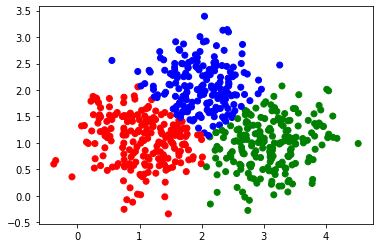

In [14]:
# 初期値設定
# 初期値は1～len(data)の中でクラスタ数の数だけ選ぶ必要がある
initial_centers = [random.randint(1, len(data_2)) for p in range(0, 3)]

# kmedoidsクラスの定義
data_2_kmedoids = kmedoids.kmedoids(data_2, initial_centers)

# 学習の実行
data_2_kmedoids.process()

# 可視化
#_ = kmeans.kmeans_visualizer.show_clusters(data_1, data_1_kmeans.get_clusters(), data_1_kmeans.get_centers(), initial_centers=initial_centers)

# 各クラスタのインデックス取得
labels = data_2_kmedoids.get_clusters()

# クラスタごとに色を分ける
color_series = pd.Series(index=np.arange(600))
c_list = ["g", "r", "b"]
for i, c in enumerate(c_list):
    color_series[labels[i]] = c

plt.scatter(data_2[:,0], data_2[:,1], color=color_series)

## パターン3

<ipython-input-15-9dbec0fb5a93>:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  color_series = pd.Series(index=np.arange(600))


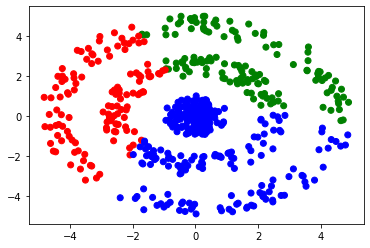

In [15]:
# 初期値設定
# 初期値は1～len(data)の中でクラスタ数の数だけ選ぶ必要がある
initial_centers = [random.randint(1, len(data_3)) for p in range(0, 3)]

# kmedoidsクラスの定義
data_3_kmedoids = kmedoids.kmedoids(data_3, initial_centers)

# 学習の実行
data_3_kmedoids.process()

# 可視化
#_ = kmeans.kmeans_visualizer.show_clusters(data_1, data_1_kmeans.get_clusters(), data_1_kmeans.get_centers(), initial_centers=initial_centers)

# 各クラスタのインデックス取得
labels = data_3_kmedoids.get_clusters()

# クラスタごとに色を分ける
color_series = pd.Series(index=np.arange(600))
c_list = ["g", "r", "b"]
for i, c in enumerate(c_list):
    color_series[labels[i]] = c

plt.scatter(data_3[:,0], data_3[:,1], color=color_series)

## パターン4

<ipython-input-13-465d603abc86>:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  color_series = pd.Series(index=np.arange(600))


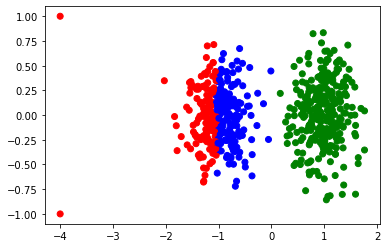

In [13]:
# 初期値設定
# 初期値は1～len(data)の中でクラスタ数の数だけ選ぶ必要がある
initial_centers = [random.randint(1, len(data_4)) for p in range(0, 3)]

# kmedoidsクラスの定義
data_4_kmedoids = kmedoids.kmedoids(data_4, initial_centers)

# 学習の実行
data_4_kmedoids.process()

# 可視化
#_ = kmeans.kmeans_visualizer.show_clusters(data_1, data_1_kmeans.get_clusters(), data_1_kmeans.get_centers(), initial_centers=initial_centers)

# 各クラスタのインデックス取得
labels = data_4_kmedoids.get_clusters()

# クラスタごとに色を分ける
color_series = pd.Series(index=np.arange(600))
c_list = ["g", "r", "b"]
for i, c in enumerate(c_list):
    color_series[labels[i]] = c

plt.scatter(data_4[:,0], data_4[:,1], color=color_series)

# xmeans

## パターン1

<ipython-input-17-8dad1b89af58>:17: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  color_series = pd.Series(index=np.arange(600))


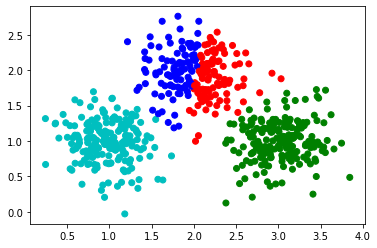

In [17]:
# 初期値設定
initial_centers = kmeans_plusplus_initializer(data_1, 2).initialize() #3はクラスタ数

# xmeansクラスの定義
data_1_xmeans = xmeans.xmeans(data_1, initial_centers)

# 学習の実行
data_1_xmeans.process()

# 可視化
#_ = kmeans.kmeans_visualizer.show_clusters(data_1, data_1_kmeans.get_clusters(), data_1_kmeans.get_centers(), initial_centers=initial_centers)

# 各クラスタのインデックス取得
labels = data_1_xmeans.get_clusters()

# クラスタごとに色を分ける
color_series = pd.Series(index=np.arange(600))
# あらかじめ多めに色を用意しておき、必要な分だけ取得する
colorlist = ["r", "g", "b", "c", "m", "y", "k", "w"]

c_list = colorlist[0:len(labels)]
for i, c in enumerate(c_list):
    color_series[labels[i]] = c

plt.scatter(data_1[:,0], data_1[:,1], color=color_series)

## パターン2

<ipython-input-18-e58dc3ef1112>:17: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  color_series = pd.Series(index=np.arange(600))


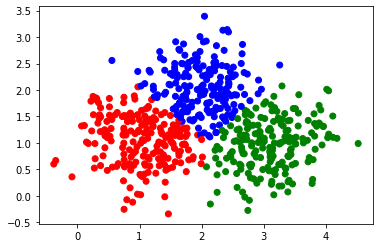

In [18]:
# 初期値設定
initial_centers = kmeans_plusplus_initializer(data_2, 3).initialize() #3はクラスタ数

# xmeansクラスの定義
data_2_xmeans = xmeans.xmeans(data_2, initial_centers)

# 学習の実行
data_2_xmeans.process()

# 可視化
#_ = kmeans.kmeans_visualizer.show_clusters(data_1, data_1_kmeans.get_clusters(), data_1_kmeans.get_centers(), initial_centers=initial_centers)

# 各クラスタのインデックス取得
labels = data_2_xmeans.get_clusters()

# クラスタごとに色を分ける
color_series = pd.Series(index=np.arange(600))
# あらかじめ多めに色を用意しておき、必要な分だけ取得する
colorlist = ["r", "g", "b", "c", "m", "y", "k", "w"]

c_list = colorlist[0:len(labels)]
for i, c in enumerate(c_list):
    color_series[labels[i]] = c

plt.scatter(data_2[:,0], data_2[:,1], color=color_series)

## パターン3

<ipython-input-19-951cb9312492>:17: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  color_series = pd.Series(index=np.arange(600))


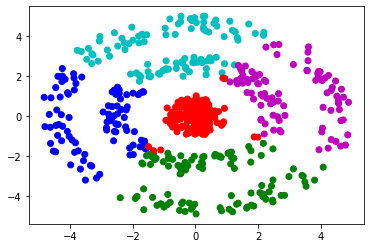

In [19]:
# 初期値設定
initial_centers = kmeans_plusplus_initializer(data_3, 2).initialize() #3はクラスタ数

# xmeansクラスの定義
data_3_xmeans = xmeans.xmeans(data_3, initial_centers)

# 学習の実行
data_3_xmeans.process()

# 可視化
#_ = kmeans.kmeans_visualizer.show_clusters(data_1, data_1_kmeans.get_clusters(), data_1_kmeans.get_centers(), initial_centers=initial_centers)

# 各クラスタのインデックス取得
labels = data_3_xmeans.get_clusters()

# クラスタごとに色を分ける
color_series = pd.Series(index=np.arange(600))
# あらかじめ多めに色を用意しておき、必要な分だけ取得する
colorlist = ["r", "g", "b", "c", "m", "y", "k", "w"]

c_list = colorlist[0:len(labels)]
for i, c in enumerate(c_list):
    color_series[labels[i]] = c

plt.scatter(data_3[:,0], data_3[:,1], color=color_series)

## パターン4

<ipython-input-14-d13ae5d56deb>:17: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  color_series = pd.Series(index=np.arange(600))


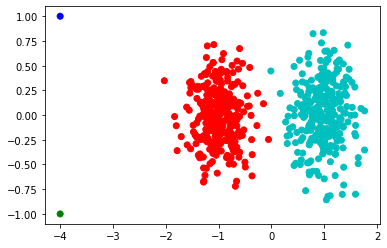

In [14]:
# 初期値設定
initial_centers = kmeans_plusplus_initializer(data_4, 2).initialize() #3はクラスタ数

# xmeansクラスの定義
data_4_xmeans = xmeans.xmeans(data_4, initial_centers)

# 学習の実行
data_4_xmeans.process()

# 可視化
#_ = kmeans.kmeans_visualizer.show_clusters(data_1, data_1_kmeans.get_clusters(), data_1_kmeans.get_centers(), initial_centers=initial_centers)

# 各クラスタのインデックス取得
labels = data_4_xmeans.get_clusters()

# クラスタごとに色を分ける
color_series = pd.Series(index=np.arange(600))
# あらかじめ多めに色を用意しておき、必要な分だけ取得する
colorlist = ["r", "g", "b", "c", "m", "y", "k", "w"]

c_list = colorlist[0:len(labels)]
for i, c in enumerate(c_list):
    color_series[labels[i]] = c

plt.scatter(data_4[:,0], data_4[:,1], color=color_series)

# DBスキャン

## パターン1

### epsを決める

In [18]:
# クラスタに含めるデータの最小値
minN = 10 # 根拠はないが、適当に決める

# knee methodを用いる
## import
from sklearn.neighbors import NearestNeighbors

# knee methodに用いる折れ線グラフ作成する関数
def knee_method_plot(data, mN): # data:入力データ, mN：クラスタに含めるデータの最小値
    ## NearestNeighborsインスタンス作成
    nearest_neighbors = NearestNeighbors(n_neighbors=mN+1) # 自分自身も含めて最近傍を取得するので、+1している
    neighbors = nearest_neighbors.fit(data)
    distances, indices = neighbors.kneighbors(data)
    distances = np.sort(distances[:,mN], axis=0)
    fig = plt.figure(figsize=(5, 5))
    plt.plot(distances)
    plt.xlabel("Points")
    plt.ylabel("Distance")
    plt.savefig("Distance_curve.png", dpi=300)
    
    return(distances)

# 図の作成
distances = (
    knee_method_plot(
        data = data_1,
        mN = minN
    )
)

# knee pointを計算する
## import
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

# knee methodによって得られたeps
est_eps = distances[knee.knee]
print(est_eps)

NameError: name 'data_1' is not defined

### DBスキャンの実行

<ipython-input-35-0bde1104d860>:23: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  color_series = pd.Series(index=np.arange(600))


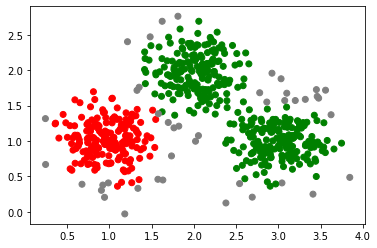

In [35]:
# dbscanインスタンス作成
data_1_dbscan = (
    dbscan.dbscan(
        data = data_1,
        eps = est_eps,
        neighbors = minN,
        ccore = True
    )
)

# 学習の実行
data_1_dbscan.process()

# 可視化
#_ = kmeans.kmeans_visualizer.show_clusters(data_1, data_1_kmeans.get_clusters(), data_1_kmeans.get_centers(), initial_centers=initial_centers)

# 各クラスタのインデックス取得
labels = data_1_dbscan.get_clusters()
# 外れ値取得
noise = data_1_dbscan.get_noise()

# クラスタごとに色を分ける
color_series = pd.Series(index=np.arange(600))
# あらかじめ多めに色を用意しておき、必要な分だけ取得する
colorlist = ["r", "g", "b", "c", "m", "y", "k", "w", "teal", "lightblue"]

c_list = colorlist[0:len(labels)]
for i, c in enumerate(c_list):
    color_series[labels[i]] = c

# 外れ値は灰色で統一
color_series[noise] = "gray"

plt.scatter(data_1[:,0], data_1[:,1], color=color_series)

## パターン2

### epsを決める

0.3156763934930809


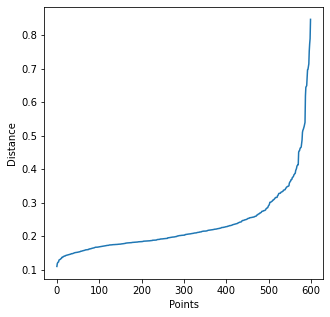

<Figure size 360x360 with 0 Axes>

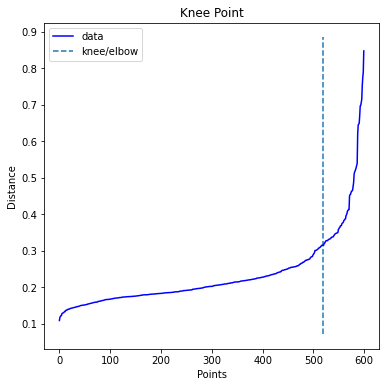

In [41]:
# クラスタに含めるデータの最小値
minN = 10 # 根拠はないが、適当に決める

# knee methodを用いる
## import
from sklearn.neighbors import NearestNeighbors

# 図の作成
distances = (
    knee_method_plot(
        data = data_2,
        mN = minN
    )
)

# knee pointを計算する
## import
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

# knee methodによって得られたeps
est_eps = distances[knee.knee]
print(est_eps)

### DBスキャンの実行

<ipython-input-42-51b1becf58fb>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  color_series = pd.Series(index=np.arange(600))


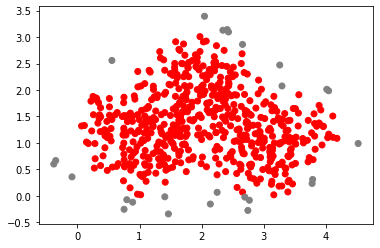

In [42]:
# dbscanインスタンス作成
data_2_dbscan = (
    dbscan.dbscan(
        data = data_2,
        eps = est_eps,
        neighbors = minN,
        ccore = True
    )
)


# 学習の実行
data_2_dbscan.process()

# 可視化
#_ = kmeans.kmeans_visualizer.show_clusters(data_1, data_1_kmeans.get_clusters(), data_1_kmeans.get_centers(), initial_centers=initial_centers)

# 各クラスタのインデックス取得
labels = data_2_dbscan.get_clusters()
# 外れ値取得
noise = data_2_dbscan.get_noise()

# クラスタごとに色を分ける
color_series = pd.Series(index=np.arange(600))
# あらかじめ多めに色を用意しておき、必要な分だけ取得する
colorlist = ["r", "g", "b", "c", "m", "y", "k", "w", "teal", "lightblue"]

c_list = colorlist[0:len(labels)]
for i, c in enumerate(c_list):
    color_series[labels[i]] = c

# 外れ値は灰色で統一
color_series[noise] = "gray"

plt.scatter(data_2[:,0], data_2[:,1], color=color_series)

## パターン3

### epsを決める

0.8585417116411149


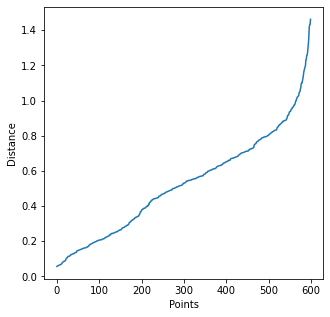

<Figure size 360x360 with 0 Axes>

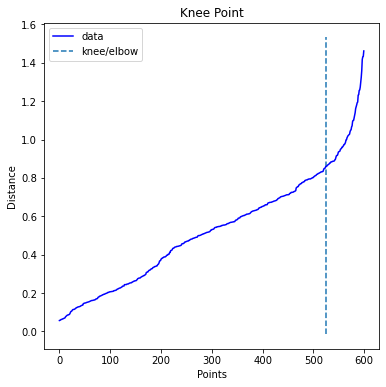

In [43]:
# クラスタに含めるデータの最小値
minN = 10 # 根拠はないが、適当に決める

# knee methodを用いる
## import
from sklearn.neighbors import NearestNeighbors

# 図の作成
distances = (
    knee_method_plot(
        data = data_3,
        mN = minN
    )
)

# knee pointを計算する
## import
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

# knee methodによって得られたeps
est_eps = distances[knee.knee]
print(est_eps)

### DBスキャンの実行

<ipython-input-44-f3029d1de0b0>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  color_series = pd.Series(index=np.arange(600))


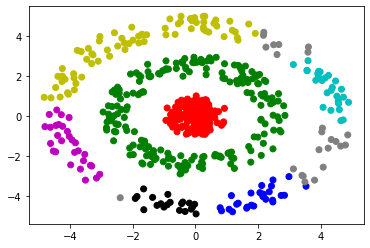

In [44]:
# dbscanインスタンス作成
data_3_dbscan = (
    dbscan.dbscan(
        data = data_3,
        eps = est_eps,
        neighbors = minN,
        ccore = True
    )
)


# 学習の実行
data_3_dbscan.process()

# 可視化
#_ = kmeans.kmeans_visualizer.show_clusters(data_1, data_1_kmeans.get_clusters(), data_1_kmeans.get_centers(), initial_centers=initial_centers)

# 各クラスタのインデックス取得
labels = data_3_dbscan.get_clusters()
# 外れ値取得
noise = data_3_dbscan.get_noise()

# クラスタごとに色を分ける
color_series = pd.Series(index=np.arange(600))
# あらかじめ多めに色を用意しておき、必要な分だけ取得する
colorlist = ["r", "g", "b", "c", "m", "y", "k", "w", "teal", "lightblue"]

c_list = colorlist[0:len(labels)]
for i, c in enumerate(c_list):
    color_series[labels[i]] = c

# 外れ値は灰色で統一
color_series[noise] = "gray"

plt.scatter(data_3[:,0], data_3[:,1], color=color_series)

## パターン4

### epsを決める

0.24464294378274995


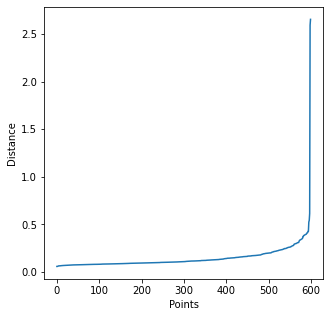

<Figure size 360x360 with 0 Axes>

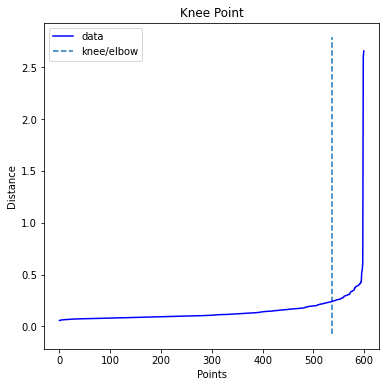

In [19]:
# クラスタに含めるデータの最小値
minN = 10 # 根拠はないが、適当に決める

# knee methodを用いる
## import
from sklearn.neighbors import NearestNeighbors

# 図の作成
distances = (
    knee_method_plot(
        data = data_4,
        mN = minN
    )
)

# knee pointを計算する
## import
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

# knee methodによって得られたeps
est_eps = distances[knee.knee]
print(est_eps)

### epsを手動補正

In [48]:
est_eps = distances[4]
print(est_eps)

3.30729323071153


### DBスキャンの実行

<ipython-input-21-4023b04a5a3a>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  color_series = pd.Series(index=np.arange(600))


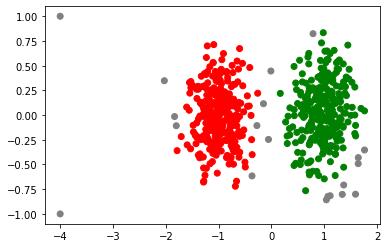

In [21]:
# dbscanインスタンス作成
data_4_dbscan = (
    dbscan.dbscan(
        data = data_4,
        eps = est_eps,
        neighbors = minN,
        ccore = True
    )
)


# 学習の実行
data_4_dbscan.process()

# 可視化
#_ = kmeans.kmeans_visualizer.show_clusters(data_1, data_1_kmeans.get_clusters(), data_1_kmeans.get_centers(), initial_centers=initial_centers)

# 各クラスタのインデックス取得
labels = data_4_dbscan.get_clusters()
# 外れ値取得
noise = data_4_dbscan.get_noise()

# クラスタごとに色を分ける
color_series = pd.Series(index=np.arange(600))
# あらかじめ多めに色を用意しておき、必要な分だけ取得する
colorlist = ["r", "g", "b", "c", "m", "y", "k", "w", "teal", "lightblue"]

c_list = colorlist[0:len(labels)]
for i, c in enumerate(c_list):
    color_series[labels[i]] = c

# 外れ値は灰色で統一
color_series[noise] = "gray"

plt.scatter(data_4[:,0], data_4[:,1], color=color_series)